# Testing untrained Grounding Dino on picture dataset

In this notebook the untrained grounding dino model is evaluated to set a benchmark and comparison between the performance on pictures and illustrated images. Since the model was originally trained on pictures we expect a better performance on this dataset overall.

### General Imports

This block has the general imports, mounts the drive and installs supervision.

In [ ]:
import torch

**Mounting drive and pip installing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install supervision

In [ ]:
!nvidia-smi

### **Loading Grounding DINO**

This block import the Grounding Dino model from github

In [ ]:
import os
HOME = os.getcwd()
print(HOME)
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
!pip install -q -e .


/content/GroundingDINO
/content/GroundingDINO
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 421 (delta 137), reused 130 (delta 123), pack-reused 238
Receiving objects: 100% (421/421), 12.85 MiB | 17.21 MiB/s, done.
Resolving deltas: 100% (215/215), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.2 MB/s eta 0:00:00


In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")

%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)

/content/GroundingDINO
/content/GroundingDINO/weights


In [ ]:
%cd {HOME}/GroundingDINO
from groundingdino.util.inference import load_model, load_image, predict, annotate

import cv2

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Import Data Classes from the dataset we will be using. Which is the Pascal VOC. Link to dataset: http://host.robots.ox.ac.uk/pascal/VOC/

In [ ]:
classes = ['dog', 'cat', 'bird', 'cow', 'horse']

joined_prompt = '. '.join(classes)

splitting the labels and images in seperate folders.

In [ ]:
import os
import shutil


PATH_DATA = '/content/drive/MyDrive/Colab Notebooks/archive2/split/data/'
PATH_SPLIT_images = '/content/drive/MyDrive/Colab Notebooks/archive2/NEWSPLIT/images/'
PATH_SPLIT_labels = '/content/drive/MyDrive/Colab Notebooks/archive2/NEWSPLIT/labels/'

# To test the Dino model on pictures we used the dataset from assignment 2 from the deep learning course!
#This is a labeled dataset of 224x224 pictures of animals, with five classes: ['dog', 'cat', 'bird', 'cow', 'horse']

# This had the labels and images in the same folder so I moved them to their own folder to be imported in DINO



# List all files in the source folder
contents = os.listdir(PATH_DATA)

# Iterate through each item in the folder
for item in contents:
    item_path = os.path.join(PATH_DATA, item)

    # Check if it's a file
    if os.path.isfile(item_path):
        # Check if the last character of the filename is 't'
        if item[-1] == 't':
            shutil.move(item_path, os.path.join(PATH_SPLIT_labels, item))
            print(f"Moved {item} to {PATH_SPLIT_labels}")

        # Check if the last character of the filename is 'g'
        elif item[-1] == 'g':
            shutil.move(item_path, os.path.join(PATH_SPLIT_images, item))
            print(f"Moved {item} to {PATH_SPLIT_images}")

In [ ]:
import os
# Change this yourself
DATA_DIRECTORY = '/content/drive/MyDrive/Colab Notebooks/archive2'

TRAIN_IMAGE_DIRECTORY = os.fsdecode('/content/drive/MyDrive/Colab Notebooks/archive2/NEWSPLIT/images/')
TRAIN_BBOX_DIRECTORY = os.fsdecode('/content/drive/MyDrive/Colab Notebooks/archive2/NEWSPLIT/labels/')


Now we can import the dataset we will be evaluating, a set of 200 images, checking if it worked by printing one

[[0.40401785714285715, 0.5647321428571429, 0.45089285714285715, 0.5580357142857143]]


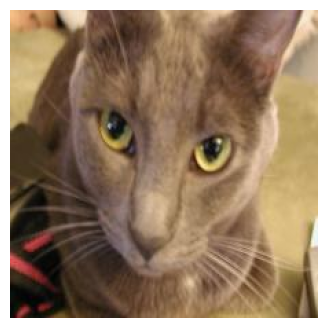

In [ ]:
import supervision as sv
import cv2

train_image_files = os.listdir(TRAIN_IMAGE_DIRECTORY)
train_images = []
train_labels = []
train_bboxes = []
for filename in train_image_files[:200]:
    # Load image
    IMAGE_PATH  = os.path.join(TRAIN_IMAGE_DIRECTORY, filename)
    image_source, image_transformed = load_image(IMAGE_PATH)
    train_images.append((image_source, image_transformed))
    # Load labels and bboxes
    BBOX_PATH = os.path.join(TRAIN_BBOX_DIRECTORY, filename[:-4] + '.txt')
    labels = []
    bboxes = []
    with open(BBOX_PATH) as f:
        split1 = f.read().split('\n')
        for s in split1:
            split2 = s.split()
            labels.append(int(split2[0]))
            bbox = [float(split2[1]),float(split2[2]),float(split2[3]),float(split2[4])]
            bboxes.append(bbox)
    train_labels.append(labels)
    train_bboxes.append(bboxes)

print(train_bboxes[0])
image = train_images[7][0]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sv.plot_image(image, (4, 4))

*Checking the ground truth labels*

<generator object <genexpr> at 0x791032947a00>


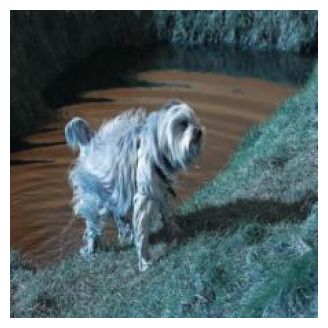

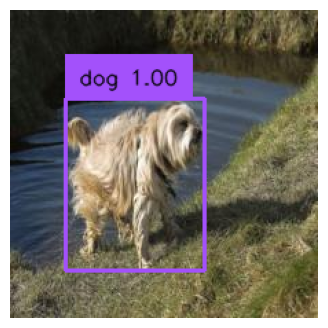

In [ ]:
image_index = 0
image_source, image_transformed = train_images[image_index]
labels = train_labels[image_index]
bboxes = train_bboxes[image_index]
print(classes[k] for k in labels)
sv.plot_image(image_source, (4, 4))

annotated_frame = annotate(image_source=image_source, boxes=torch.tensor(bboxes), logits = torch.tensor([1 for box in bboxes]),phrases=[classes[k] for k in labels])
sv.plot_image(annotated_frame, (4, 4))

Checking the current device

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
print("Current device is: " + str(device))

Current device is: cuda:0


*Checking DINO's prediction*

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


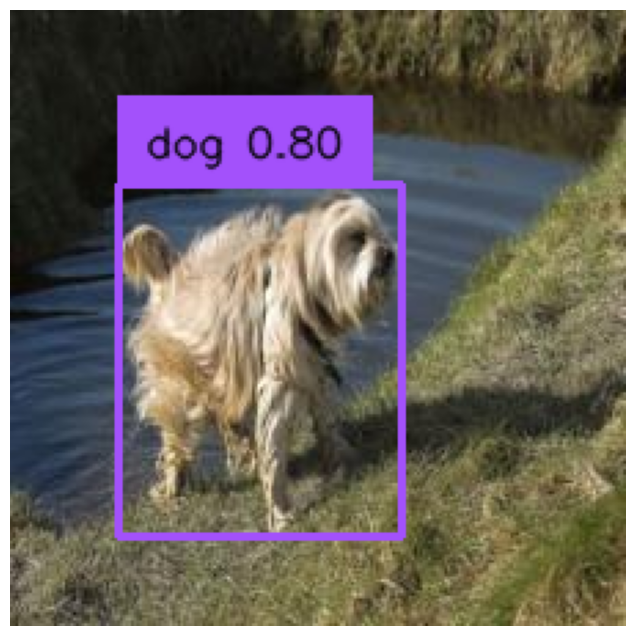

224


In [ ]:

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = train_images[0]

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=joined_prompt,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device = device
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
sv.plot_image(annotated_frame, (8, 8))
print(len(train_images[0][0]))

## **Evaluation**

### Imports for evaluation

Here we import the metrics needed to calculate the average and mean avarage precision

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install -q roboflow dataclasses-json onemetric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from onemetric.cv.object_detection import MeanAveragePrecision
from onemetric.cv.object_detection import ConfusionMatrix
from onemetric.cv.object_detection.average_precision import AveragePrecision

In [ ]:
from groundingdino.util.inference import Model
model2 = Model(model_config_path=CONFIG_PATH, model_checkpoint_path=WEIGHTS_PATH, device = device)

final text_encoder_type: bert-base-uncased


In [ ]:
from tqdm.notebook import tqdm
from groundingdino.util.box_ops import box_cxcywh_to_xyxy
import numpy as np

### Load data

Now we run the dataset through Dino to obtain the result we want to evaluate. The result of this block is the detection batch. Which we will later compare to the true labels.

In [ ]:
ground_truth_batches, detections_batches = [], []

for k in tqdm(list(range(len(train_images)))):
    image_source, image_transformed = train_images[k]
    labels = train_labels[k]
    xywh_bboxes = train_bboxes[k]

    # bboxes from GD are in xywh format, but onemetric needs xyxy format in numpy array
    xyxy_bboxes = box_cxcywh_to_xyxy(torch.tensor(xywh_bboxes)).numpy()
    labels_np = np.array(labels)
    labels_np = np.reshape(labels_np,(len(labels_np),1))
    ground_truth = np.hstack((xyxy_bboxes,labels_np))
    ground_truth_batches.append(ground_truth)
    #print(ground_truth)

    # create detections batches
    detections = model2.predict_with_classes(
        image=image_source,
        classes=classes,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    # drop potential detections with phrase that is not part of CLASSES set
    detections = detections[detections.class_id != None]
    # drop potential detections with area close to area of whole image
    # detections = detections[(detections.area / (h * w)) < 0.9 ]
    # drop potential double detections
    detections = detections.with_nms()

    detections_batch = np.column_stack((
        detections.xyxy/224,
        detections.class_id,
        detections.confidence
    ))
    detections_batches.append(detections_batch)
    # print(detections_batch)

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


### Evaluate

**Batch size test**


First we check quickly if elements in the batches have the right format for the performance metric functions. Being ground truths Nx5 and detecion Mx6.

In [ ]:
print(ground_truth_batches[0])
print(f'The size of the ground truth batch = {len(ground_truth_batches[0])} x {len(ground_truth_batches[0][0])}')

print(detections_batches[0])
print(f'The size of the detection batch = {len(detections_batches[0])} x {len(detections_batches[0][0])}')

[[0.17857143 0.28571427 0.62946427 0.84375    0.        ]]
The size of the ground truth batch = 1 x 5
[[0.17397614 0.28404579 0.63934976 0.85605538 0.         0.77179891]]
The size of the detection batch = 1 x 6


**Calculating the mean average precision, and the precision per class**

In [ ]:
mean_average_precision = MeanAveragePrecision.from_detections(
    true_batches=ground_truth_batches,
    detection_batches=detections_batches,
    num_classes= int(len(classes)),
    iou_threshold=0.5
)
print(len(classes))
print("mAP =", mean_average_precision.value)

5
mAP = 0.8864579059122928


In [ ]:
precisions = []
for i in range(len(classes)):
  average_precision = AveragePrecision.from_detections(
      true_batches=ground_truth_batches,
      detection_batches=detections_batches,
      class_idx=i
  )
  ap = average_precision.value
  clas = classes[i]
  precisions.append(ap)
  print(f'The average precision for class {clas} = {ap}. \n')

The average precision for class dog = 0.7882636605987275. 

The average precision for class cat = 1.0. 

The average precision for class bird = 0.8846431685141363. 

The average precision for class cow = 0.9234693877551021. 

The average precision for class horse = 0.8359133126934983. 



Plotting the values to visualise the results!

The mean average precision is 0.8864579059122928.



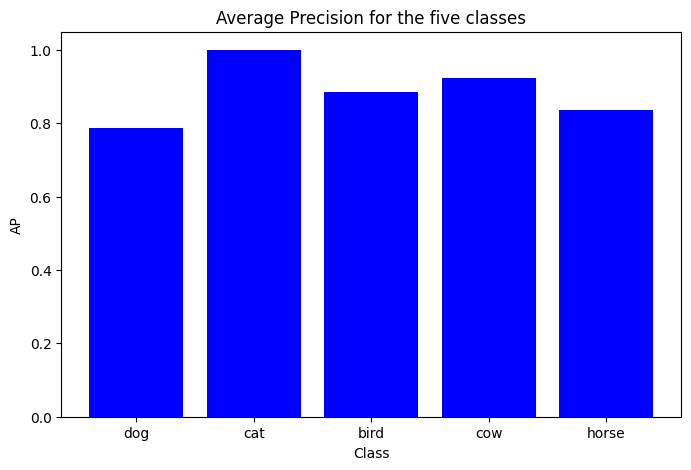

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (8, 5))
plt.bar(classes, precisions, color ='blue')
plt.title("Average Precision for the five classes")
plt.xlabel("Class")
plt.ylabel("AP")
mAP = np.mean(precisions)
print(f"The mean average precision is {mAP}.\n")

***Implementing the Confusion Matrix, just for extra insight***

In [ ]:
from onemetric.cv.object_detection import ConfusionMatrix

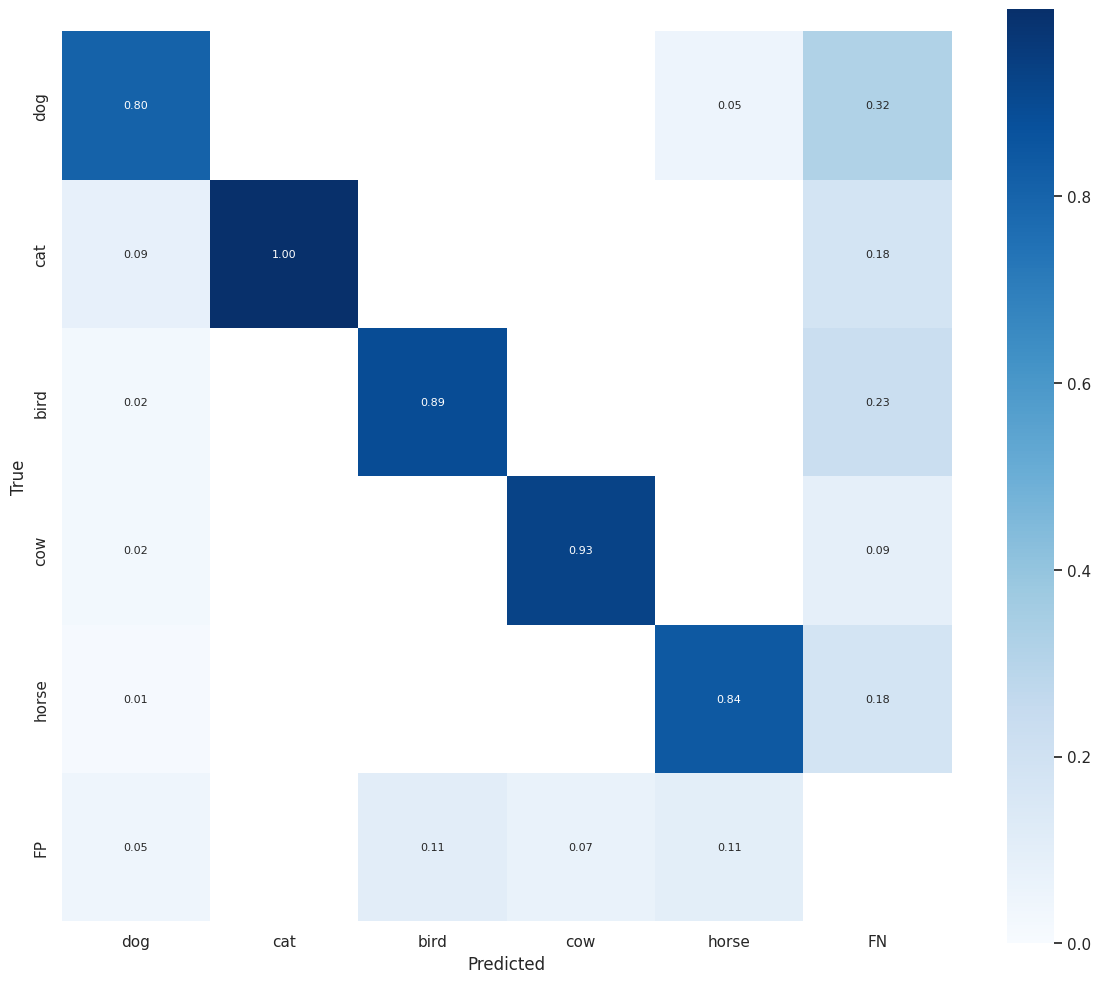

In [ ]:
confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=ground_truth_batches,
    detection_batches=detections_batches,
    num_classes=len(classes),
    conf_threshold=BOX_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=classes)